***Import the datasets and libraries,check space and datatype***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving train.csv to train (1).csv


***Import Test Data Set***

In [ ]:
data_train = pd.read_csv('train.csv')
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

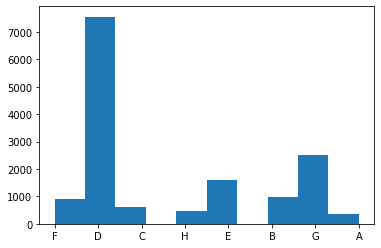

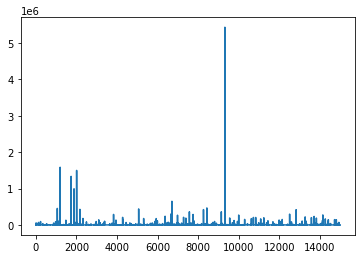

In [ ]:
#visualization
#individual plots

plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [ ]:
#remove videos with adview greater than 2000000 as outlier
data_train=data_train[data_train["adview"]<2000000]
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


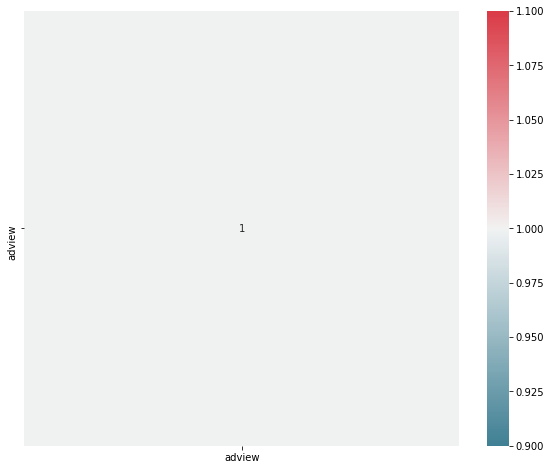

In [ ]:
#Heatmap
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr=data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [ ]:
# assigning each category a number for category feature

category = {'A' :1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data_train["category"] = data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# Removing character "F" present in test data

data_train=data_train[data_train.views != 'F']
data_train=data_train[data_train.likes != 'F']
data_train=data_train[data_train.dislikes != 'F']
data_train=data_train[data_train.comment != 'F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# convert values to integer for views, likes,comment, dislikes and adview

data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
# Encoding features like category,Duration,vidid

from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# Convert time_in_sec for duration
import datetime
import time

In [ ]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


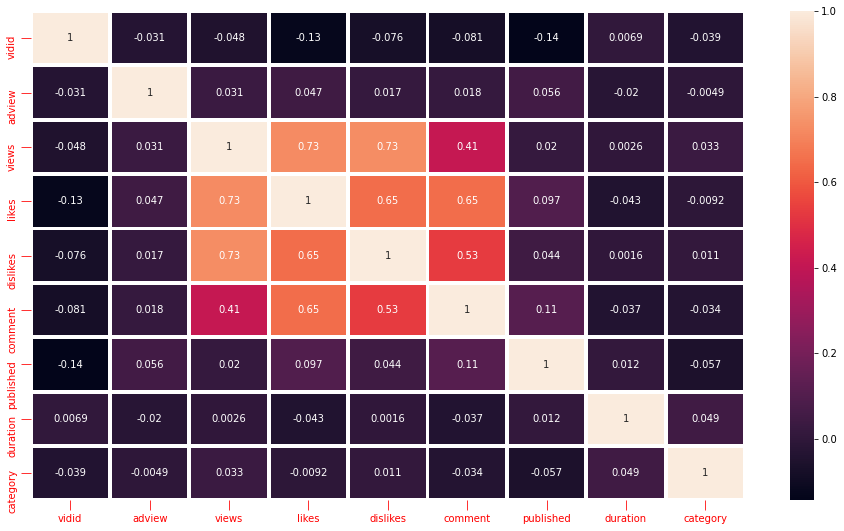

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,9))
ax=sns.heatmap(data_train.corr(),annot=True,linewidth=3) 
ax.tick_params(size=10,color='r',labelsize=10,labelcolor='r')
plt.show()

In [ ]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2716.5170765027324
Mean Squared Error: 894011542.715164
Root Mean Squared Error: 29900.02579790131


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3254.6684537022784
Mean Squared Error: 616999783.4404986
Root Mean Squared Error: 24839.480337569436


In [ ]:
# Artificial Neural Network
#!pip install keras
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 13s 1ms/step - loss: 325013856.5422 - mean_squared_error: 325013856.5422
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 1081146722.5722 - mean_squared_error: 1081146722.5722
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 633445575.5851 - mean_squared_error: 633445575.5851
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 764947260.3998 - mean_squared_error: 764947260.3998
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 680504191.1204 - mean_squared_error: 680504191.1204
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 424886901.4082 - mean_squared_error: 424886901.4082
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 384819004.2820 - mean_squared_error: 384819004.2820
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 682954959.6321 - mean_squared_err

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest, "randomforest_youtubeadview.pkl")

['randomforest_youtubeadview.pkl']

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import joblib

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving test.csv to test (1).csv


In [ ]:
# import the test dataset
data_test=pd.read_csv("test.csv")
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
# Removing character "F" present in test data
data_test=data_test[data_test.views != 'F']
data_test=data_test[data_test.likes != 'F']
data_test=data_test[data_test.dislikes != 'F']
data_test=data_test[data_test.comment != 'F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
# Assignment each category a number for category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
# convert values to integer for views, likes,comment, dislikes and adview
data_test["views"]=pd.to_numeric(data_test["views"])
data_test["comment"]=pd.to_numeric(data_test["comment"])
data_test["likes"]=pd.to_numeric(data_test["likes"])
data_test["dislikes"]=pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

In [ ]:
# Encoding features like category,Duration,vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:
# Convert time_in_sec for duration
import datetime
import time

In [ ]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [ ]:

# Drop the column "vidid" as is has no effect to target variable
data_test=data_test.drop(["vidid"],axis=1)

In [ ]:
# Dataset
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [ ]:
model=joblib.load("randomforest_youtubeadview.pkl")
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Predict your model using test dataset
pred_y = model.predict(data_test)

In [ ]:
pred_y

In [ ]:
# Change the datatype of "adview" from float to int
final_data_test=data_test
final_data_test["adview"]=pred_y
final_data_test["adview"]=final_data_test["adview"].astype(int)

In [ ]:
final_data_test.head()

,views,likes,dislikes,comment,published,duration,category,adview
0,440238,6153,218,1377,2053,449,2,121110
1,1040132,8171,340,1047,1825,389,6,121110
2,28534,31,11,1,1009,2274,4,121110
3,1316715,2284,250,274,116,595,7,121110
4,1893173,2519,225,116,1892,188,2,121110


In [ ]:
# save the model in .csv file named as "Predictions_Submission"
final_data_test.to_csv("Predictions_Submission.csv")